In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [37]:
df = pd.read_csv("/Users/eren/Documents/GitHub/Kaggle-Projects/advanced_ames/train.csv")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

id gives no insight from data so we should drop it for better 

(1460, 80)


/var/folders/bl/r2644t156ysdhnf63_n5zlbr0000gn/T/ipykernel_2094/539924432.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"],color="b",bins=100,hist_kws={"alpha":0.4},ax=ax)


<Axes: xlabel='SalePrice', ylabel='Density'>

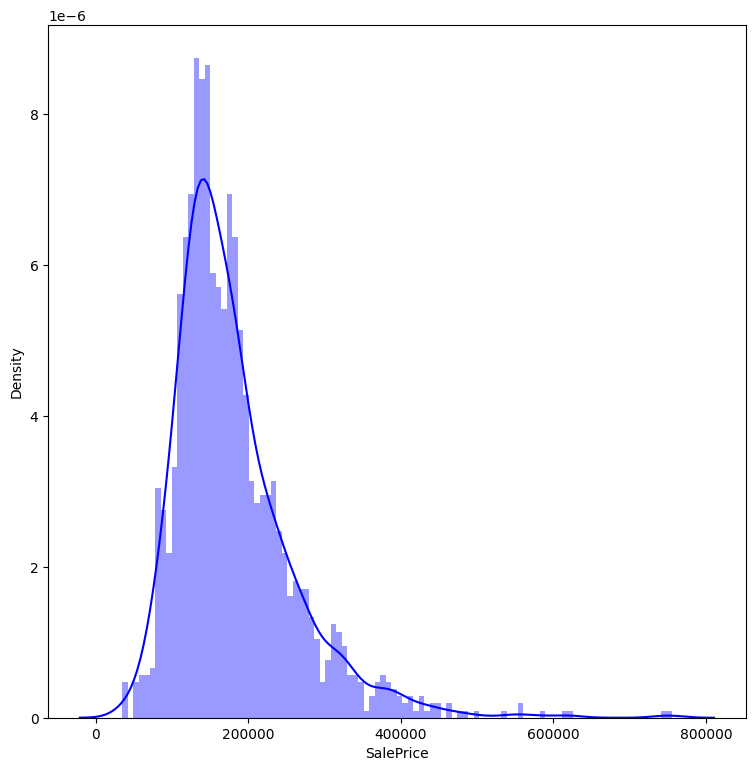

In [38]:
df.drop("Id",axis=1,inplace=True) 
print(df.shape) #shape after drop

fig,ax=plt.subplots(1,1,figsize=(9,9))

sns.distplot(df["SalePrice"],color="b",bins=100,hist_kws={"alpha":0.4},ax=ax)

#with that we can see the distribution of the price over training data.



In [39]:
df.dtypes.unique() #we can assure that there are 2 number data types but one object meaning it might be categorical




array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [40]:
df_num = df.select_dtypes(include=["int64","float64"])

display(df_num.head()) #this gives us 37 columns indicating that datahas 37 numerical types

df_o = df.select_dtypes(include=["object"]) #this function selects type of data u want

display(df_o.head()) #i enclosed dataframes to compare them

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [41]:
df["Exterior2nd"].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

<Axes: ylabel='Density'>

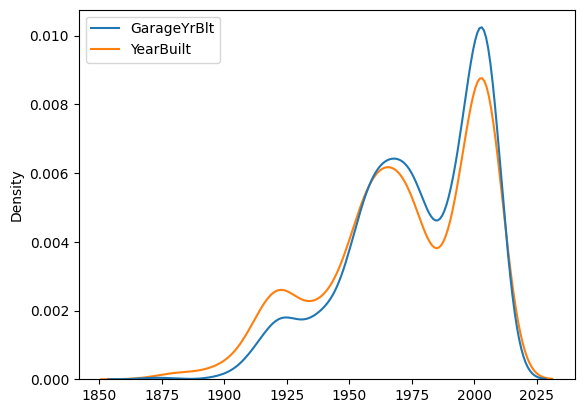

In [46]:
d =df.loc[:,["GarageYrBlt","YearBuilt"]]


sns.kdeplot(data=d) #we can see that at some point around 1925 this looks corrupted because garage can't be built before house

In [43]:
#this function here replaces inconsistent values and making it more readable 
def clean_df(df):
    df["Exterior2nd"] = df["Exterior2nd"].replace({"Brk Cmn":"BrkComm"})

    df["GarageYrBlt"] = df["GarageYrBlt"].where(df.GarageYrBlt <=2010, df.YearBuilt) #garage year can't be bigger than 2010 because biggest yearbuilt is 2010

    df.rename(columns = 
        {"1stFlrSF":"FirstFlrSF",
         "2ndFlrSf":"SecondFlrSf",
         "3rdFlrSf":"ThirdFlrSF",
        },inplace = True
    ) #reanmed it because using numbers as column names is hard.

clean_df(df)

    

In [ ]:
#as next step we have to inspect closer into categorical columns if they are ordered or unordered.


unordered_cols=["Street","Alley"]

In [45]:
from xgboost import XGBRFRegressor


x_reg = XGBRFRegressor()




In [44]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X.pop("SalePrice")


train_x ,test_x , train_y, test_y = train_test_split(X,y,train_size = 0.8,random_state=31)

display(train_x.shape)
display(train_y.shape)
display(test_x.shape)
display(test_y.shape)

(1168, 79)

(1168,)

(292, 79)

(292,)